In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

import sys
sys.path.append('/content/gdrive/My Drive/Food_VR')

Mounted at /content/gdrive/


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time 
import re

In [3]:
def FileName_Func(input):
  index = input.find('P')
  fileName = input[index:]
  return fileName

In [4]:
def Extract_Parameters(input):
  parameters = {}
  for i in range(0, 79):
    if input['Oxysoft export of'][i] == 'Start of measurement':
      parameters['Start of measurement'] = input[input.columns[1]][i]
    else:
      pass
    if input['Oxysoft export of'][i] == 'Data file duration':
      parameters['Data file duration'] = input[input.columns[1]][i]
    else:
      pass
    if input['Oxysoft export of'][i] == 'Data file total number of samples':
      parameters['Data file total number of samples'] = input[input.columns[1]][i]
    else:
      pass
    if input['Oxysoft export of'][i] == 'DPF':
      parameters['DPF'] = input[input.columns[1]][i]
    else:
      pass

  return parameters


In [5]:
def Extract_ColNames(input):
  Col_Names = []
  for i in range(0,79):
    if input['Oxysoft export of'][i] == 'Column':
      for j in range(1,35):
        Col_Names.append(input[input.columns[1]][i+j])
    else:
      pass
  return Col_Names

In [6]:
def Slicing_ColNames(input):
  new_Col = []
  for i in input:
      i = i.replace('(', '')
      i = i.replace(')','')
      i = i.replace(' ', '')
      i = i.replace('Participant_820','')
      new_Col.append(i)
  return new_Col

In [7]:
def DataFormatting_Func(path):

  raw_data = pd.read_excel(path)
  fileName = FileName_Func(raw_data.columns[1])
  parameters  = Extract_Parameters(raw_data)
  Col_Names = Extract_ColNames(raw_data)
  new_Col = Slicing_ColNames(Col_Names)
  del new_Col[0]
  del new_Col[-1]
  data = raw_data.iloc[80:,]
  data = data.drop(['Oxysoft export of'], axis=1)
  data = data.drop(data.iloc[:, 32:], axis = 1)
  data.columns = new_Col
  data.reset_index(drop=True, inplace=True)

  return fileName, new_Col, data




In [8]:
path = '/content/gdrive/My Drive/Food_VR/Data/Participant_820/PhaseB/Participant_820.xlsx'

In [9]:
fileName, new_Col, data = DataFormatting_Func(path)

In [10]:
data.head()

,Rx1-Tx1O2Hb,Rx1-Tx1HHb,Rx1-Tx1tHb,Rx1-Tx1HbDiff,Rx1-Tx2O2Hb,Rx1-Tx2HHb,Rx1-Tx2tHb,Rx1-Tx2HbDiff,Rx1-Tx3O2Hb,Rx1-Tx3HHb,Rx1-Tx3tHb,Rx1-Tx3HbDiff,Rx1-Tx4O2Hb,Rx1-Tx4HHb,Rx1-Tx4tHb,Rx1-Tx4HbDiff,Rx2-Tx5O2Hb,Rx2-Tx5HHb,Rx2-Tx5tHb,Rx2-Tx5HbDiff,Rx2-Tx6O2Hb,Rx2-Tx6HHb,Rx2-Tx6tHb,Rx2-Tx6HbDiff,Rx2-Tx7O2Hb,Rx2-Tx7HHb,Rx2-Tx7tHb,Rx2-Tx7HbDiff,Rx2-Tx8O2Hb,Rx2-Tx8HHb,Rx2-Tx8tHb,Rx2-Tx8HbDiff
0,83.4144,34.6383,118.053,48.7761,120.299927,63.062927,183.362854,57.23703,119.447128,56.889927,176.337158,62.557205,129.875229,67.128822,197.004059,62.746365,393.909546,214.994995,608.905334,178.915054,414.679535,212.636993,627.316345,202.042557,371.335541,77.647789,448.983337,293.688049,404.769531,208.319397,613.089356,196.450058
1,83.4144,34.6383,118.053,48.7761,120.299927,63.062927,183.362854,57.23703,119.447128,56.889927,176.337158,62.557205,129.875229,67.128822,197.004059,62.746365,393.909546,214.994995,608.905334,178.915054,414.679535,212.636993,627.316345,202.042557,371.335541,77.647789,448.983337,293.688049,404.769531,208.319397,613.089356,196.450058
2,83.4144,34.6383,118.053,48.7761,120.299927,63.062927,183.362854,57.23703,119.447128,56.889927,176.337158,62.557205,129.875229,67.128822,197.004059,62.746365,393.909546,214.994995,608.905334,178.915054,414.679535,212.636993,627.316345,202.042557,371.335541,77.647789,448.983337,293.688049,404.769531,208.319397,613.089356,196.450058
3,83.4144,34.6383,118.053,48.7761,120.299927,63.062927,183.362854,57.23703,119.447128,56.889927,176.337158,62.557205,129.875229,67.128822,197.004059,62.746365,393.909546,214.994995,608.905334,178.915054,414.679535,212.636993,627.316345,202.042557,371.335541,77.647789,448.983337,293.688049,404.769531,208.319397,613.089356,196.450058
4,83.4144,34.6383,118.053,48.7761,120.299927,63.062927,183.362854,57.23703,119.447128,56.889927,176.337158,62.557205,129.875229,67.128822,197.004059,62.746365,393.909546,214.994995,608.905334,178.915054,414.679535,212.636993,627.316345,202.042557,371.335541,77.647789,448.983337,293.688049,404.769531,208.319397,613.089356,196.450058


In [11]:
new_Col

['Rx1-Tx1O2Hb',
 'Rx1-Tx1HHb',
 'Rx1-Tx1tHb',
 'Rx1-Tx1HbDiff',
 'Rx1-Tx2O2Hb',
 'Rx1-Tx2HHb',
 'Rx1-Tx2tHb',
 'Rx1-Tx2HbDiff',
 'Rx1-Tx3O2Hb',
 'Rx1-Tx3HHb',
 'Rx1-Tx3tHb',
 'Rx1-Tx3HbDiff',
 'Rx1-Tx4O2Hb',
 'Rx1-Tx4HHb',
 'Rx1-Tx4tHb',
 'Rx1-Tx4HbDiff',
 'Rx2-Tx5O2Hb',
 'Rx2-Tx5HHb',
 'Rx2-Tx5tHb',
 'Rx2-Tx5HbDiff',
 'Rx2-Tx6O2Hb',
 'Rx2-Tx6HHb',
 'Rx2-Tx6tHb',
 'Rx2-Tx6HbDiff',
 'Rx2-Tx7O2Hb',
 'Rx2-Tx7HHb',
 'Rx2-Tx7tHb',
 'Rx2-Tx7HbDiff',
 'Rx2-Tx8O2Hb',
 'Rx2-Tx8HHb',
 'Rx2-Tx8tHb',
 'Rx2-Tx8HbDiff']

In [12]:
fileName

'Participant_820'

Text(0.5, 1.0, 'plot showing fluctuations in HHb(deOxygenated hemoglobin) concentrations form Reciver 1 and Light Source 1')

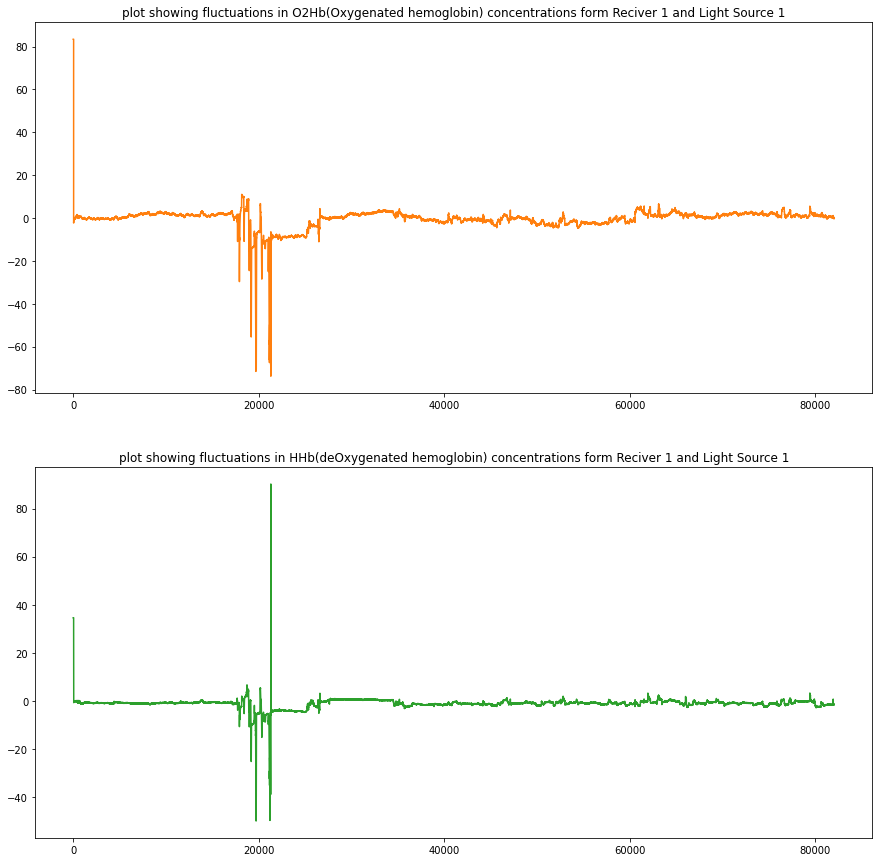

In [35]:
fig = plt.figure(figsize = (15,15))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.plot(data['Rx1-Tx1O2Hb'],'tab:orange')
ax2.plot(data['Rx1-Tx1HHb'],'tab:green')

ax.set_xlabel('Each Instance of data collection')
ax.set_ylabel('Concentration')

ax1.set_title('plot showing fluctuations in O2Hb(Oxygenated hemoglobin) concentrations form Reciver 1 and Light Source 1')
ax2.set_title('plot showing fluctuations in HHb(deOxygenated hemoglobin) concentrations form Reciver 1 and Light Source 1')